In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 16 17:10:53 2020

@author: wanxiang.shen@u.nus.edu
"""

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.metrics import auc as calculate_auc

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggModel, loadmap

np.random.seed(666) #just for reaptable results

def prc_auc_score(y_true, y_score):
    precision, recall, threshold  = precision_recall_curve(y_true, y_score) #PRC_AUC
    auc = calculate_auc(recall, precision)
    return auc

In [3]:
df1 = pd.read_excel('./proteins_processed.xlsx', index_col = 0)
df2 = pd.read_excel('./Metabolites_processed.xlsx', index_col = 0)
df2 = df2.loc[df1.index]

df = df1.join(df2)
dfx = df[df.columns[2:]]
dfy = df[['Severe']]*1.

In [5]:
mp = loadmap('./results/COV-S.mp')

In [6]:
X_new = mp.batch_transform(dfx.values, scale_method = 'standard')
dfyy = dfy.reset_index()

100%|##########| 41/41 [00:03<00:00, 11.98it/s]


In [7]:
severe_list = ['XG40', 'XG42', 'XG43', 'XG44', 'XG45', 'XG46']
non_severe_list =  ['XG20', 'XG21', 'XG22', 'XG23', 'XG24', 'XG25']

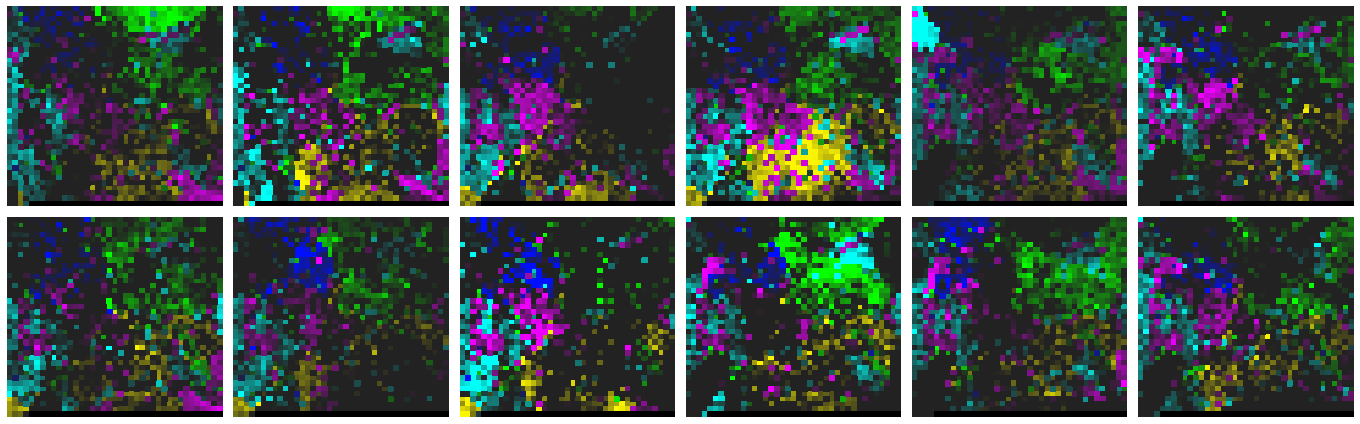

In [10]:
from aggmap import show

idx = dfyy.groupby(['Severe']).apply(lambda x:x.index.tolist())

rows = [severe_list, non_severe_list]
row_names = ['Severe', 'non-Severe']

n = 6
fontsize = 22

fig, axes = plt.subplots(nrows=2, ncols=n, figsize=(19,6), sharex = True, sharey = True)



for row, row_ax in zip(rows, axes):
    pidx = row        
    for pid_name, ax in zip(pidx, row_ax):
        pid = dfyy[dfyy['index'] == pid_name].index[0]
        x = X_new[pid]
        #ax.imshow(X_new[pid].sum(axis=-1), cmap = 'jet')
        show.imshow(x, ax = ax,  mode = 'dark', color_list= pd.Series(mp.colormaps).tolist(), x_max=x.max()-2, vmin=-0.1, ) # vmax=x.max()
        #ax.set_xlabel(pid_name, fontsize = fontsize) 

# for ax, row in zip(axes[:,0], row_names):
#     ax.set_ylabel(row, fontsize = 28)  

fig.tight_layout()
fig.savefig('./results/fmp.png', bbox_inches='tight', dpi=400) 

In [11]:
x.shape

(39, 39, 5)